In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense

In [2]:
current_path = os.getcwd()

In [3]:
os.listdir(current_path)

['app.py',
 'cat_dog.ipynb',
 'cat_dog_trained.ipynb',
 'Data',
 'LICENSE',
 'README.md',
 'templates']

In [4]:
print("total number of cats images:", len(os.listdir(os.path.join(current_path,'Data','images','cats' )))) 

total number of cats images: 349


In [5]:
print("total number of dogs images:", len(os.listdir(os.path.join(current_path,'Data','images','dogs' )))) 

total number of dogs images: 348


In [6]:
images_path = os.path.join(current_path, 'Data', 'images')

In [7]:
os.listdir(images_path)

['cats', 'dogs']

In [8]:
path_dict={'cats':[],'dogs':[]}
for dir in os.listdir(images_path):
    directory_path = os.path.join(images_path, dir)
    for images in os.listdir(directory_path):
        path_dict[dir].append(os.path.join(directory_path,images))

In [9]:
path_dict

{'cats': ['c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_1.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_10.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_100.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_101.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_102.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_103.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_104.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_106.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_109.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_11.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_111.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_113.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_114.jpg',
  'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_116.jpg',
  

In [10]:
from PIL import Image

In [11]:
path_dict['cats'][10]

'c:\\Users\\STM\\Desktop\\cat dog\\Data\\images\\cats\\cat_111.jpg'

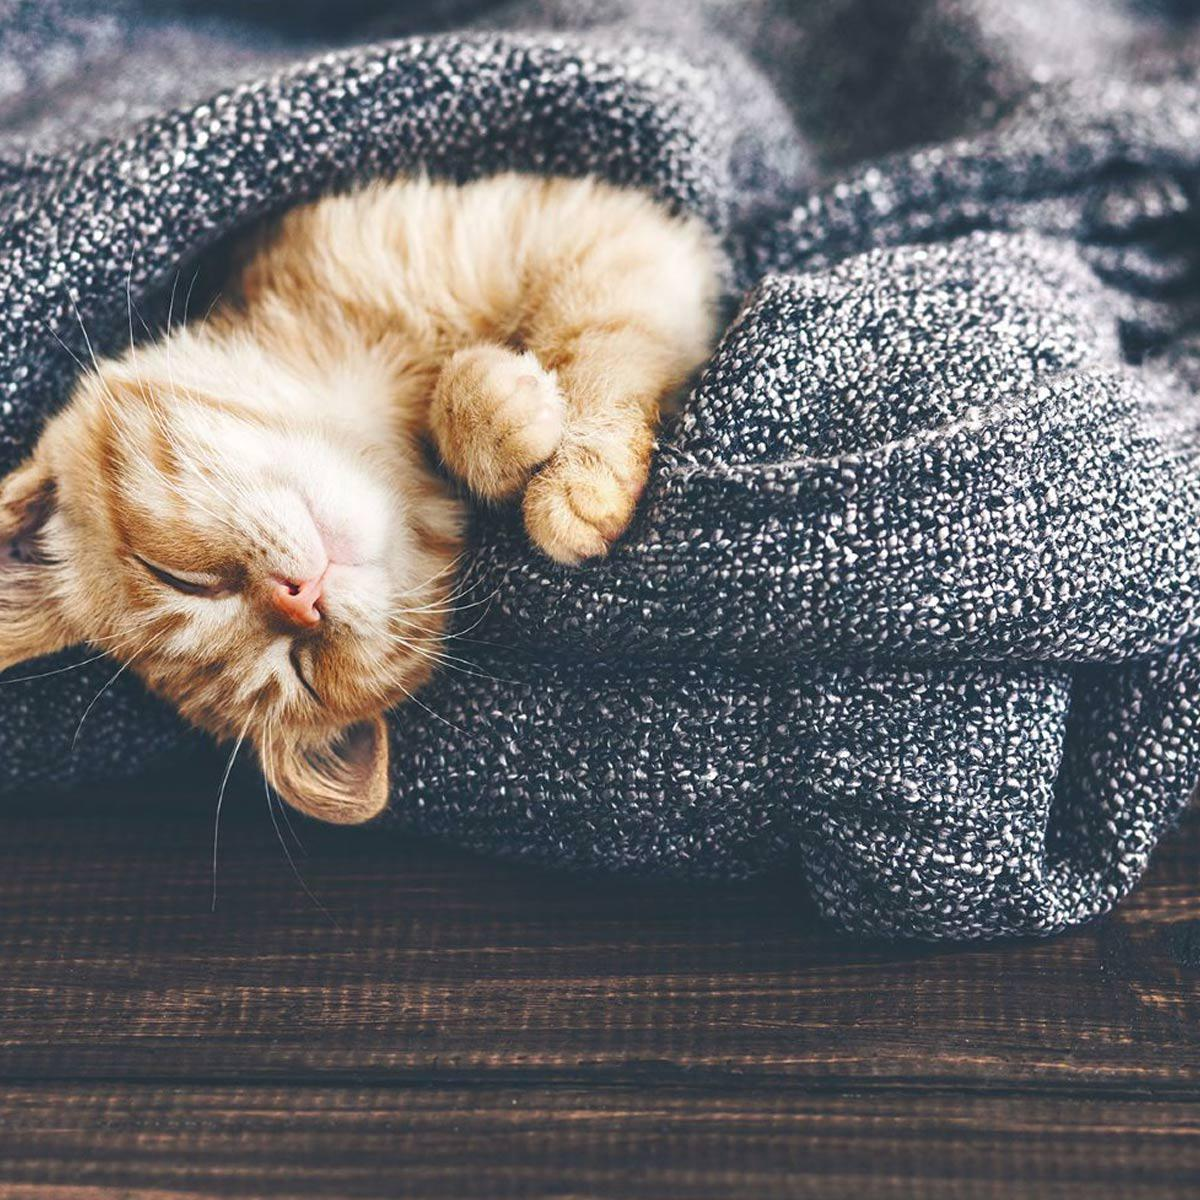

In [12]:
Image.open(path_dict['cats'][10])

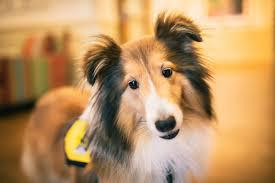

In [13]:
Image.open(path_dict['dogs'][12])

In [14]:
path_dict.keys()

dict_keys(['cats', 'dogs'])

In [15]:
import cv2

img_arr_list=[]
labels=[]
for key,val in path_dict.items():
    for path in val:
       img_arr=cv2.imread(path)
       resized_img=cv2.resize(img_arr,(224,224))
       img_arr_list.append(resized_img)
       labels.append(key)

In [16]:
img_arr_list = np.array(img_arr_list)

In [17]:
img_arr_list.shape

(697, 224, 224, 3)

In [18]:
labels = np.array(labels)

In [19]:
labels.shape

(697,)

In [20]:
labels

array(['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
       'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',
      

In [21]:
encoded_labels = np.where(labels == 'cats', 0, 1)

In [22]:
encoded_labels= np.array([0 if label== 'cats' else 1 for label in labels])
print(encoded_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_arr_list, encoded_labels, test_size=0.2, random_state=42)

In [24]:
x_train= x_train / 255
x_test= x_test / 255

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [26]:
model=Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),


    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\STM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,825,345 (10.78 MB)

 Trainable params: 2,825,345 (10.78 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4883 - loss: 0.8071
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5386 - loss: 0.6852
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6122 - loss: 0.6922
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6050 - loss: 0.6473
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7684 - loss: 0.5290


In [29]:
pred=model.predict(x_test)
pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step


array([[0.67524743],
       [0.7532711 ],
       [0.96261865],
       [0.51979625],
       [0.822344  ],
       [0.5438576 ],
       [0.49654722],
       [0.6078318 ],
       [0.981474  ],
       [0.9675374 ],
       [0.86024284],
       [0.40060902],
       [0.84401774],
       [0.5111843 ],
       [0.69749534],
       [0.8001275 ],
       [0.87494177],
       [0.76902825],
       [0.9602466 ],
       [0.94168895],
       [0.61787575],
       [0.21278504],
       [0.63551974],
       [0.5752318 ],
       [0.47157747],
       [0.4275291 ],
       [0.96023303],
       [0.5661241 ],
       [0.7554074 ],
       [0.6011094 ],
       [0.931224  ],
       [0.85829735],
       [0.96457577],
       [0.35498592],
       [0.62092686],
       [0.8709274 ],
       [0.6176906 ],
       [0.77514684],
       [0.32217118],
       [0.2119945 ],
       [0.55765086],
       [0.65143657],
       [0.8370837 ],
       [0.61462384],
       [0.97771   ],
       [0.5969068 ],
       [0.81758964],
       [0.758

In [30]:
pred=(pred>0.5).astype(int)
pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [31]:
model.save('model.h5')